In [1]:
import sys
sys.path.append('../..')

In [2]:
import sbi4abm.sbi
from sbi4abm.sbi import analysis, utils
from sbi4abm.utils import sampling, plotting
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import torch
import pickle
import seaborn as sns
import torch.nn.functional as F

/home/pmms2/sbi4abm/py_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
matplotlib.rc('text', usetex=True)
plt.rcParams.update({
  "text.usetex": False,
  "font.family": "serif"
})
plt.rcParams.update({
    'text.latex.preamble':r"\usepackage{amsmath}"+"\n"+r"\usepackage{bm}"
})

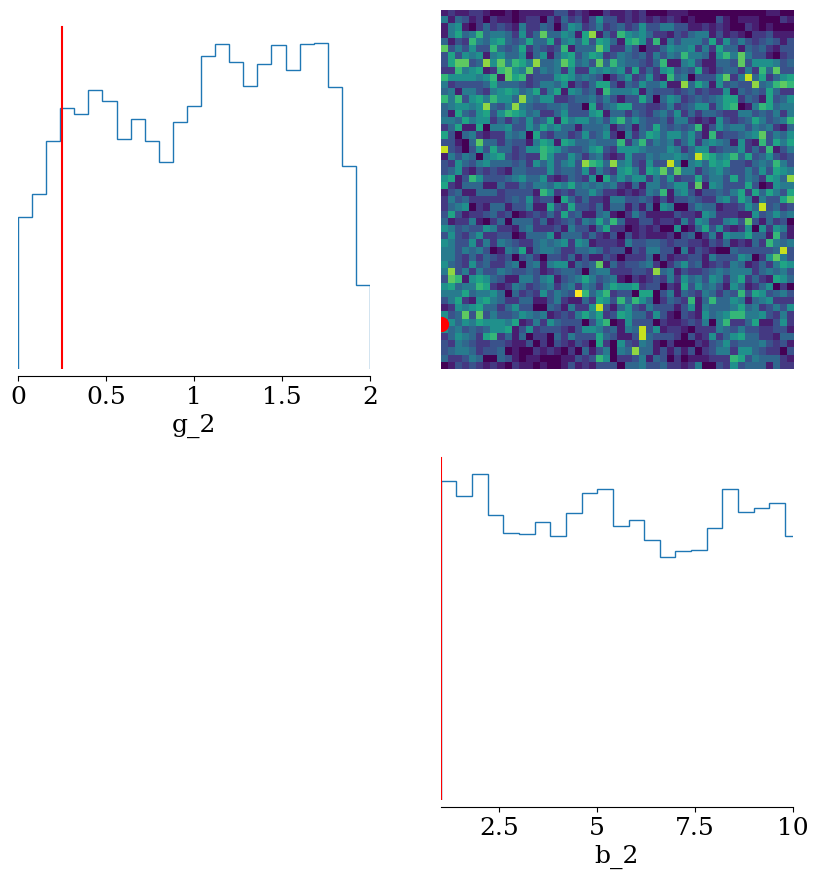

In [4]:
covid = np.loadtxt("../../exp_dir/covid/1718568622.5112076/samples.txt")
plt.rcParams.update({'font.size':18}) # something about latex font
_ = analysis.pairplot(covid, limits=[[0,2], [1,10]], points=[np.array([0.25, 1])],
                      points_colors='r', labels=["g_2", "b_2"],
                      hist_diag={"alpha": 1.0, "bins": 25, "density": False, "histtype": "step"})

In [10]:
from sbi4abm.utils import io

covidf = io.load_task('covid')

file_name = "1718568622.5112076"
with open(f"../../exp_dir/covid/{file_name}/posteriors.pkl", 'rb') as file:
    posterior = pickle.load(file)
    posterior = posterior[0]

Only one parameter has a uniform distribution.


In [6]:
mean_estimate = np.mean(covid, axis=0)
print(f"Mean estimate: {mean_estimate}")

Mean estimate: [1.03276137 5.90669599]


In [7]:
true_theta = torch.tensor(covidf[3])
mean_theta = torch.tensor(mean_estimate)
print(true_theta)
print(mean_theta)
loss = F.mse_loss(mean_theta, true_theta)
print(f"Loss between mean theta and true theta: {loss.item()}")

tensor([0.2500, 1.0000], dtype=torch.float64)
tensor([1.0328, 5.9067], dtype=torch.float64)
Loss between mean theta and true theta: 12.344190474575486


In [9]:
y_star = covidf[0](mean_estimate.tolist())
y_star = torch.tensor([y_star[0], y_star[1], y_star[2], y_star[3], y_star[4]])
print(y_star)

Param Value:  1.0327613739188108
Command line: /home/pmms2/report9/covid-sim/build/src/CovidSim /c:120 /NR:1 /PP:/home/pmms2/report9/covid-sim/report9/GB_suppress/preGB_R0=2.0.txt /P:/home/pmms2/report9/covid-sim/report9/GB_suppress/p_PC_CI_HQ_SD.txt /CLP1:400 /CLP2:1000 /CLP3:1000 /CLP4:1000 /CLP5:300 /CLP6:1.0327613739188108 /CLP7:5.9066959943175315 /O:/home/pmms2/report9/covid-sim/report9/GB_suppress/output/PC_CI_HQ_SD_400_300_R0=2.6 /D:/home/pmms2/report9/covid-sim/report9/population/GB_pop2018.bin /L:/home/pmms2/report9/covid-sim/report9/population/NetworkGB_120T.bin /R:1.3 98798150 729101 17389101 4797132


Param=/home/pmms2/report9/covid-sim/report9/GB_suppress/p_PC_CI_HQ_SD.txt
Out=/home/pmms2/report9/covid-sim/report9/GB_suppress/output/PC_CI_HQ_SD_400_300_R0=2.6
Dens=/home/pmms2/report9/covid-sim/report9/population/GB_pop2018.bin
Bitmap Format = *.bmp
sizeof(int)=4 sizeof(long)=8 sizeof(float)=4 sizeof(double)=8 sizeof(unsigned short int)=2 sizeof(int *)=8
Assigned number of threads (120) > MAX_NUM_THREADS (96)
Using 96 threads
Thread 0 initialised
Thread 93 initialised
Thread 94 initialised
Thread 6 initialised
Thread 1 initialised
Thread 7 initialised
Thread 2 initialised
Thread 12 initialised
Thread 10 initialised
Thread 5 initialised
Thread 8 initialised
Thread 20 initialised
Thread 22 initialised
Thread 18 initialised
Thread 26 initialised
Thread 30 initialised
Thread 65 initialised
Thread 16 initialised
Thread 92 initialised
Thread 3 initialised
Thread 15 initialised
Thread 27 initialised
Thread 23 initialised
Thread 17 initialised
Thread 40 initialised
Thread 9 initialised
Thre

Checking /home/pmms2/report9/covid-sim/report9/GB_suppress/output/PC_CI_HQ_SD_400_300_R0=2.6.avNE.severity.xls
Index(['t', 'PropSocDist', 'Rt', 'TG', 'SI', 'S', 'I', 'R', 'incI', 'incC',
       'Mild', 'ILI', 'SARI', 'Critical', 'CritRecov', 'SARIP', 'CriticalP',
       'CritRecovP', 'prevQuarNotInfected', 'prevQuarNotSymptomatic',
       'incMild', 'incILI', 'incSARI', 'incCritical', 'incCritRecov',
       'incSARIP', 'incCriticalP', 'incCritRecovP', 'incDeath', 'incDeath_ILI',
       'incDeath_SARI', 'incDeath_Critical', 'cumMild', 'cumILI', 'cumSARI',
       'cumCritical', 'cumCritRecov', 'cumDeath', 'cumDeath_ILI',
       'cumDeath_SARI', 'cumDeath_Critical', 'PropSocDist_v', 'Rt_v', 'TG_v',
       'SI_v', 'S_v', 'I_v', 'R_v', 'incI_v', 'incC_v', 'Mild_v', 'ILI_v',
       'SARI_v', 'Critical_v', 'CritRecov_v', 'incMild_v', 'incILI_v',
       'incSARI_v', 'incCritical_v', 'incCritRecov_v', 'incDeath_v',
       'incDeath_ILI_v', 'incDeath_SARI_v', 'incDeath_Critical_v', 'cumMild_v',


In [15]:
print(y_star)

tensor([293666., 587483.], dtype=torch.float64)


In [17]:
print(covidf[2])

[  46071.   92584.   93320. 6838963.       0.]


In [19]:
import os
print(os.path.exists("/home/pmms2/report9/covid-sim/report9/GB_suppress/output/PC_CI_HQ_SD_400_300_R0=2.6.avNE.severity.xls"))

True
